In [2]:
import pandas as pd

In [8]:
df = pd.read_csv("/content/us-trade-deficit-by-country-2025.csv")

In [9]:
df.columns

Index(['flagCode', 'country', 'USTradeDeficit_TradeDeficit_usd_2024',
       'USTradeDeficit_USImports_usd_2024',
       'USTradeDeficit_USExports_usd_2024',
       'USTradeDeficit_USTradeBalance_2024',
       'USTradeDeficit_USTotalTrade_2024'],
      dtype='object')

Colunas do CSV: Index(['flagCode', 'country', 'USTradeDeficit_TradeDeficit_usd_2024',
       'USTradeDeficit_USImports_usd_2024',
       'USTradeDeficit_USExports_usd_2024',
       'USTradeDeficit_USTradeBalance_2024',
       'USTradeDeficit_USTotalTrade_2024'],
      dtype='object')


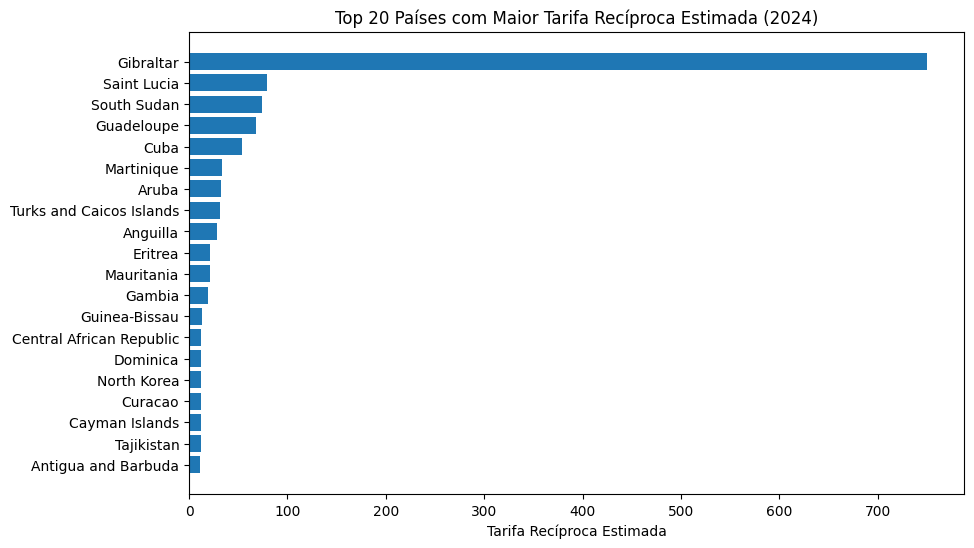

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

epsilon = 4
phi = 0.25

csv_filename = "/content/us-trade-deficit-by-country-2025.csv"

df = pd.read_csv(csv_filename)



def calc_reciprocal_tariff(row):
    trade_balance = row["USTradeDeficit_USTradeBalance_2024"]
    imports = row["USTradeDeficit_USImports_usd_2024"]
    return round(abs(trade_balance / (2 * imports)), 2)

df["Reciprocal_Tariff"] = df.apply(calc_reciprocal_tariff, axis=1)

df_sorted = df.sort_values(by="Reciprocal_Tariff", ascending=False)

In [32]:
import numpy as np

In [42]:
df["USTradeDeficit_TradeDeficit_usd_2024_log"] = np.log(df["USTradeDeficit_TradeDeficit_usd_2024"])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


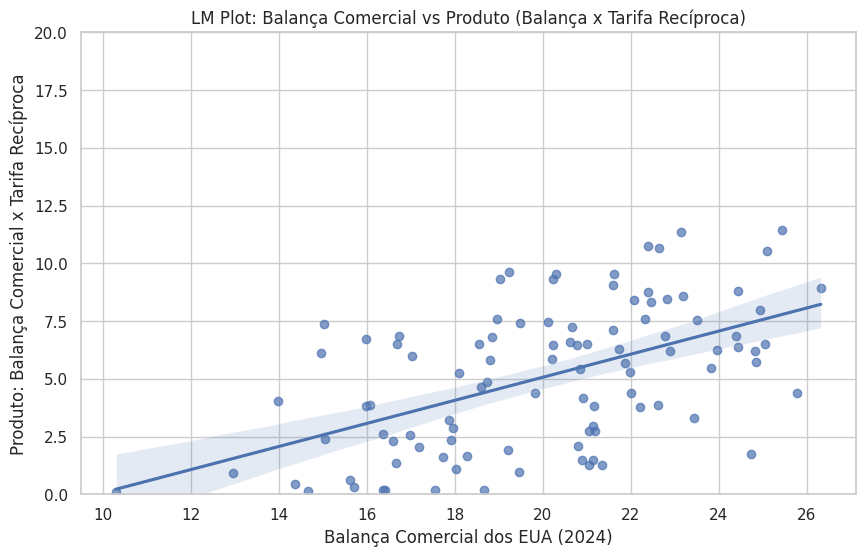

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Balance_Tariff_Product"] = df["USTradeDeficit_TradeDeficit_usd_2024_log"] * df["Reciprocal_Tariff"]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x="USTradeDeficit_TradeDeficit_usd_2024_log",
            y="Balance_Tariff_Product",
            data=df,
            scatter_kws={"alpha": 0.7})

plt.ylim(0,20)
plt.xlabel("Balança Comercial dos EUA (2024)")
plt.ylabel("Produto: Balança Comercial x Tarifa Recíproca")
plt.title("LM Plot: Balança Comercial vs Produto (Balança x Tarifa Recíproca)")

plt.show()